# Limpieza de Datos

## Revisión del Dataset

In [3]:
# Importar librerías
import pandas as pd

In [99]:
# Leer el archivo

df_netflix = pd.read_csv('netflix_titles.csv')
df_netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [101]:
# Mostrar la información general

print("\033[1;31m" + "Información General" + "\033[0m\n")
df_netflix.info()

Información General

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [103]:
# Utilizar el 'show_id' como índice principal

df_netflix = pd.read_csv('netflix_titles.csv', index_col = 0)
df_netflix.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Identificar filas duplicadas

In [8]:
# Identificar las columnas duplicadas

duplicadas = df_netflix.duplicated().sum()
print("\033[1;31m" + "Filas Duplicadas" + "\033[0m\n", duplicadas)

Filas Duplicadas
 0


In [9]:
# Identifica las columnas categóricas

df_net = df_netflix.select_dtypes(include = ['object']).columns.tolist()
print("\033[1;31m" + "Columnas Categóricas" + "\033[0m\n\n", df_net)

Columnas Categóricas

 ['type', 'title', 'director', 'cast', 'country', 'date_added', 'rating', 'duration', 'listed_in', 'description']


## Tratamiento de la data faltante

### Analizar la data faltante

In [119]:
# Contar la data faltante (nulos)

null = df_netflix.isnull().sum().sort_values(ascending = False)
null_counts = null[null > 0]

for col in null_counts.index:
    perc = ((df_netflix[col].isnull().sum() / len(df_netflix)) * 100).round(2)
    print(f"\033[33;1mFilas faltantes en {col}:\033[0m {df_netflix[col].isnull().sum()}, \033[33;1mPorcentaje:\033[0m {perc}%")

Filas faltantes en date_added: 10, Porcentaje: 0.11%


In [13]:
# Eliminar la columna

print("\033[1;31m" + "Eliminar Columna Director" + "\033[0m\n")
df_netflix.drop('director', axis = 1) # axis=0 -> Fila, axis=1 -> Columna

Eliminar Columna Director



,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...
s8803,Movie,Zodiac,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
s8804,TV Show,Zombie Dumb,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
s8805,Movie,Zombieland,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...


In [14]:
# Eliminar las filas en donde hace falta el dato en la columna 'director'

print("\033[1;31m" + "Eliminar Filas nulas en Director" + "\033[0m\n")
index = df_netflix[df_netflix['director'].isnull()].index
df_netflix.drop(index, axis = 0)
df_netflix.info()

Eliminar Filas nulas en Director

<class 'pandas.core.frame.DataFrame'>
Index: 8807 entries, s1 to s8807
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8807 non-null   object
 1   title         8807 non-null   object
 2   director      6173 non-null   object
 3   cast          7982 non-null   object
 4   country       7976 non-null   object
 5   date_added    8797 non-null   object
 6   release_year  8807 non-null   int64 
 7   rating        8803 non-null   object
 8   duration      8804 non-null   object
 9   listed_in     8807 non-null   object
 10  description   8807 non-null   object
dtypes: int64(1), object(10)
memory usage: 1.1+ MB


In [15]:
# Uso dropNa

print("\033[1;31m" + "Usando dropna" + "\033[0m\n")
df_netflix.dropna(subset = 'director').isnull().sum()

Usando dropna



type              0
title             0
director          0
cast            473
country         422
date_added        0
release_year      0
rating            1
duration          3
listed_in         0
description       0
dtype: int64

In [105]:
# Reemplazar los valores nulos con Unknown

print("\033[1;31m" + "Reemplazar valores con Unknown" + "\033[0m\n")
df_netflix['director'] = df_netflix['director'].fillna('Unknown')
df_netflix[df_netflix['director'] == "Unknown"].head()

Reemplazar valores con Unknown



,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s4,TV Show,Jailbirds New Orleans,Unknown,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
s11,TV Show,"Vendetta: Truth, Lies and The Mafia",Unknown,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B..."
s15,TV Show,Crime Stories: India Detectives,Unknown,NaN,NaN,"September 22, 2021",2021,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Docuseries",Cameras following Bengaluru police on the job ...


In [107]:
# Invertir valores de la columna rating a duration

null = df_netflix['duration'].isnull()
df_netflix.loc[null, ['rating', 'duration']] = df_netflix.loc[null, ['duration', 'rating']].values
print("\033[1;31m" + "Invertir Valores" + "\033[0m\n")
df_netflix[df_netflix['duration'].isnull()]

Invertir Valores



,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,


In [109]:
# Valores nulos en rating

df_netflix['rating'].unique()
moda = df_netflix['rating'].mode()[0]
df_netflix['rating'] = df_netflix['rating'].fillna(moda)
print("\033[1;31m" + "Rellenar Valores Nulos en Rating" + "\033[0m")
df_netflix['rating'].isnull().sum()

Rellenar Valores Nulos en Rating


0

In [111]:
# Obtener la moda de la columna country
# moda = df_netflix['country'].mode()

print("\033[1;31m" + "Moda de Columna Country" + "\033[0m")
moda = "".join(df_netflix['country'].mode())
moda

Moda de Columna Country


'United States'

In [113]:
# Rellenar valores nulos con la moda

print("\033[1;31m" + "Rellenar con Moda" + "\033[0m\n")
df_netflix['country'] = df_netflix['country'].fillna(moda)
print("\033[1;33m" + "Valores Nulos:" + "\033[0m", df_netflix['country'].isnull().sum())

Rellenar con Moda

Valores Nulos: 0


In [115]:
# Verificar si existen valores nulos para la columna Director
df_netflix['director'].isnull().sum()

0

In [121]:
# backward, forward ==> bfill() ffill()

df_netflix.fillna(method = 'ffill') # El nulo se rellena con el valor anterior
df_netflix.fillna(method = 'bfill') # El nulo se rellena con el valor siguiente

C:\Users\Developer\AppData\Local\Temp\ipykernel_30292\2312888412.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_netflix.fillna(method = 'ffill') # El nulo se rellena con el valor anterior
C:\Users\Developer\AppData\Local\Temp\ipykernel_30292\2312888412.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_netflix.fillna(method = 'bfill') # El nulo se rellena con el valor siguiente


,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...
s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
s8804,TV Show,Zombie Dumb,Unknown,Unknown,United States,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...


In [127]:
# Reemplazar los valores nulos de Cast con Unknown

print("\033[1;31m" + "Reemplazar valores con Unknown" + "\033[0m\n")
df_netflix['cast'] = df_netflix['cast'].fillna('Unknown')
print("\033[1;33m" + "Valores Nulos:" + "\033[0m", df_netflix['cast'].isnull().sum())

Reemplazar valores con Unknown

Valores Nulos: 0


In [137]:
# Crear un nuevo DataFrame de Películas

df_movies = df_netflix[df_netflix['type'] == 'Movie']
print("\033[1;31m" + "Nuevo Dataframe Movies" + "\033[0m\n")
df_movies.head(2)

Nuevo Dataframe Movies



,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...


In [143]:
# Tratar el dato faltante de la columna Date_added

print("\033[1;31m" + "Datos Faltante en Date_added" + "\033[0m\n")
print("\033[1;33m" + "Valores Nulos:" + "\033[0m", df_movies['date_added'].isnull().sum()) 

Datos Faltante en Date_added

Valores Nulos: 0


In [149]:
# Crear una nueva columna 'minutes' con los minutos de la película

df_movies['minutes'] = df_movies['duration'].str.split(expand = True)[0].astype(int) # Separar los números de la columna Duration
print("\033[1;31m" + "Nueva Columna Minutes" + "\033[0m\n")
df_movies

Nueva Columna Minutes



C:\Users\Developer\AppData\Local\Temp\ipykernel_30292\1137214469.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies['minutes'] = df_movies['duration'].str.split(expand = True)[0].astype(int) # Separar los números de la columna Duration


,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,minutes
show_id,,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90
s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,91
s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",125
s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,104
s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,127
...,...,...,...,...,...,...,...,...,...,...,...,...
s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,96
s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",158
s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,88


## Identificar los valores atípicos

In [175]:
# Identificar los diferentes valores de la columna 'minutes'

print("\033[1;31m" + "Valores de Columna Minutes" + "\033[0m\n")
df_movies.value_counts('minutes')

Valores de Columna Minutes



minutes
90     152
97     146
93     146
94     146
91     144
      ... 
189      1
191      1
193      1
194      1
312      1
Name: count, Length: 205, dtype: int64

Histograma



<Axes: ylabel='Frequency'>

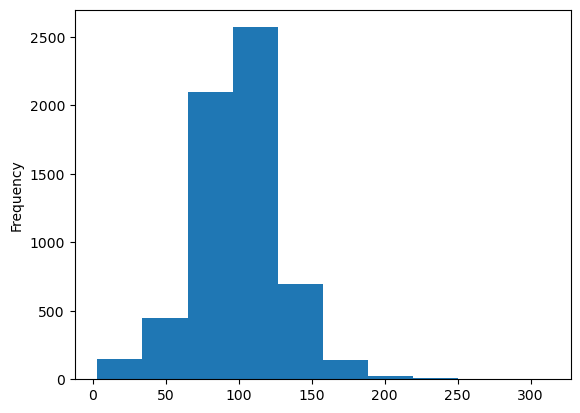

In [179]:
# Graficar los valores de la columna 'minutes'

print("\033[1;31m" + "Histograma" + "\033[0m\n")
df_movies['minutes'].plot(kind = 'hist', bins = 10)

In [185]:
# Obtener los rangos de valores de acuerdo a la gráfica

print("\033[1;33m" + "Rangos de valores" + "\033[0m\n")
df_movies['minutes'].value_counts(bins = 10).sort_index()

Rangos de valores



(2.69, 33.9]       147
(33.9, 64.8]       450
(64.8, 95.7]      2098
(95.7, 126.6]     2569
(126.6, 157.5]     692
(157.5, 188.4]     144
(188.4, 219.3]      22
(219.3, 250.2]       6
(250.2, 281.1]       2
(281.1, 312.0]       1
Name: count, dtype: int64

In [201]:
# Ver los datos atípicos: > 33.9 y < 219
# Eliminar los outlayers

print("\033[1;31m" + "Eliminar Datos Atípicos" + "\033[0m\n")
df_movies = df_movies[~((df_movies['minutes'] < 33.9) | (df_movies['minutes'] > 219))]

Eliminar Datos Atípicos



<Axes: >

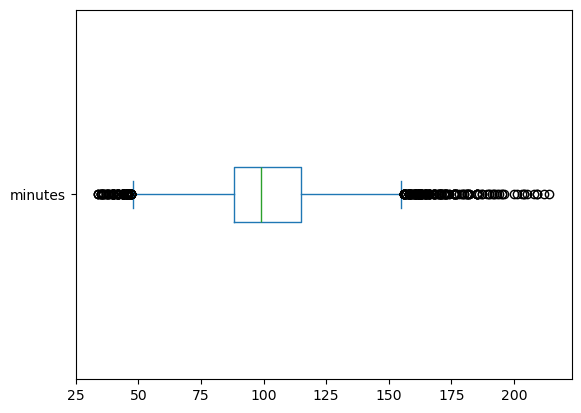

In [203]:
df_movies['minutes'].plot(kind = 'box', vert = False)

### Valores atípicos de datos categóricos

In [209]:
# Analizar la columna 'rating'

print("\033[1;31m" + "Columna Rating" + "\033[0m\n")
df_movies['rating'].value_counts()

Columna Rating



rating
TV-MA       2045
TV-14       1405
R            796
TV-PG        514
PG-13        489
PG           284
TV-Y7        119
TV-G         117
TV-Y          80
NR            75
G             40
TV-Y7-FV       5
NC-17          3
UR             3
Name: count, dtype: int64

In [211]:
# Guardar los datos en un dataset nuevo y limpio
df_movies.to_csv("netflix_titles_clean.csv")